In [18]:
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

from pandas import get_dummies

df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Deep-Learning-Workshop/master/Chapter02/Datasets/iris.csv')

df.head()

,petallength,petalwidth,sepallength,sepalwidth,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


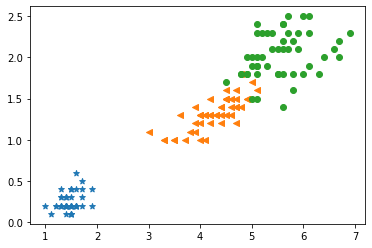

In [19]:
plt.scatter(df[df['species']==0]['sepallength'], df[df['species']==0]['sepalwidth'], marker='*')
plt.scatter(df[df['species']==1]['sepallength'], df[df['species']==1]['sepalwidth'], marker='<')
plt.scatter(df[df['species']==2]['sepallength'], df[df['species']==2]['sepalwidth'], marker='o')


In [20]:
x = df.drop('species', axis=1).values
y = df['species'].values

In [21]:
y = get_dummies(y)
y = y.values

In [22]:
x = tf.Variable(x, dtype=tf.float32)
Number_of_features = 4
Number_of_units = 3

In [31]:
#weights and bias

weights = tf.Variable(tf.random.uniform(minval=0, maxval=1, shape=(Number_of_features, Number_of_units)))
bias = tf.Variable(tf.zeros(Number_of_units))

def perceptron(x):
    z = tf.add(tf.matmul(x, weights), bias)
    output = tf.nn.softmax(z)
    return output

optimizer = tf.optimizers.Adam(.01)

def train(i):
    for n in range(i):
        loss = lambda: abs(tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=perceptron(x))))
        optimizer.minimize(loss, [weights, bias])
        

In [32]:
train(1000)
tf.print(weights)

[[1.70194423 1.456797 -0.384475678]
 [3.03729081 -0.288960099 -1.97899079]
 [-2.2186048 0.577475 3.65447497]
 [-2.21752262 -2.01034856 4.07295227]]


In [33]:
ypred = perceptron(x)
ypred = tf.round(ypred)
accuracy_score(y, ypred)

0.98

In [56]:
confusion_matrix(y.argmax(axis=1), ypred.numpy().argmax(axis=1))

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])